# Impact of Spectre/Meltdown patch on performance (CSD3 Skylake)

This notebook contains the results of the ARCHER benchmarks run before and after patching for the Spectre/Meltdown security issues on the CSD3 Skylake system at the University of Cambridge.

No siginificant performance difference can be seen for any of the benchmarks apart from the synthetic test of parallel write performance (benchio) where we see a 10-15% performance drop in terms of the maximum write bandwidth achieved. This variation is within the variation we would expect from a parallel file system during normal operation so may not be associated with the patching process.

The results for the random ring latency in the HPCC b_eff benchmark show some odd features that require further investigation.

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (9,6)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../python-modules')

## Application Benchmarks

### CASTEP Al Slab (al3x3)

In [3]:
from appanalysis import castep

In [4]:
castep_unpatched = {1:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.1nodes',
                    2:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.2nodes',
                    4:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.4nodes',
                    8:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.8nodes',
                    16:'../apps/CASTEP/al3x3/results/CSD3-Skylake/al3x3.castep.16nodes'}

In [5]:
cpn = 32
cores_unpatched, scf_unpatched, su_unpatched = castep.calcperf(castep_unpatched, cpn)

          Nodes           Cores    Mean SCF (s)         Speedup
          =====           =====    ============         =======
              1              32            61.3            1.00
              2              64            31.4            1.95
              4             128            19.7            3.10
              8             256            14.1            4.35
             16             512            10.5            5.81


In [6]:
castep_patched = {1:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.1nodes',
                    2:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.2nodes',
                    4:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.4nodes',
                    8:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.8nodes',
                    16:'../apps/CASTEP/al3x3/results/CSD3-Skylake-patched/al3x3.castep.16nodes'}

In [7]:
cores_patched, scf_patched, su_patched = castep.calcperf(castep_patched, cpn)

          Nodes           Cores    Mean SCF (s)         Speedup
          =====           =====    ============         =======
              1              32            60.9            1.00
              2              64            44.6            1.36
              4             128            19.9            3.06
              8             256            13.7            4.45
             16             512            11.5            5.31


In [57]:
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Cores','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=====','=========','=======','=========='))
for i, cores in enumerate(cores_unpatched):
    perf_u = 1.0/scf_unpatched[i]
    perf_p = 1.0/scf_patched[i]
    print('{:15d}{:15.3f}{:15.3f}{:15.3f}'.format(cores, perf_u, perf_p, perf_p/perf_u))

          Cores      Unpatched        Patched     Comparison
          =====      =========        =======     ==========
             32          0.016          0.016          1.006
             64          0.032          0.022          0.703
            128          0.051          0.050          0.991
            256          0.071          0.073          1.028
            512          0.095          0.087          0.920


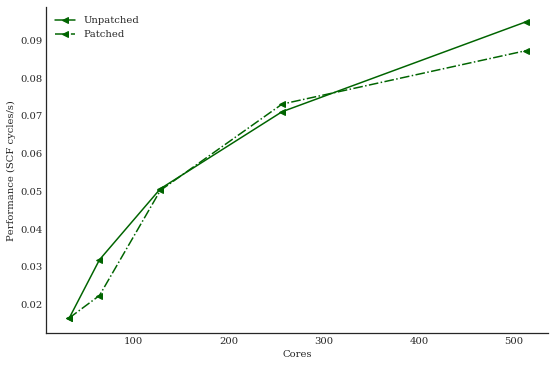

In [9]:
plt.plot(cores_unpatched, [1/x for x in scf_unpatched], '<-', color='darkgreen', label='Unpatched')
plt.plot(cores_patched, [1/x for x in scf_patched], '<-.', color='darkgreen', label='Patched')
plt.xlabel('Cores')
plt.ylabel('Performance (SCF cycles/s)')
plt.legend(loc='best')
sns.despine()

### GROMACS

In [10]:
from appanalysis import gromacs

In [11]:
gmx_u = {2:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_2nodes_201712010921.log',
              4:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_4nodes_201711301547.log',
              8:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_8nodes_201712010955.log',
              16:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_16nodes_201711301527.log',
              32:'../apps/GROMACS/large/results/CSD3Skylake/nc2-cubic-md_32nodes_201711301537.log'
               }

In [12]:
gmx_cores_u, gmx_perf_u, gmx_su_u = gromacs.calcperf(gmx_u, cpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              64           0.108            1.00
              4             128           0.198            1.83
              8             256           0.327            3.03
             16             512           0.513            4.75
             32            1024           0.777            7.19


In [13]:
gmx_p = {2:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_2nodes_201801151114.log',
              4:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_4nodes_201801151056.log',
              8:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_8nodes_201801151033.log',
              16:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_16nodes_201801151140.log',
              32:'../apps/GROMACS/large/results/CSD3Skylake-patched/nc2-cubic-md_32nodes_201801151154.log'
               }

In [14]:
gmx_cores_p, gmx_perf_p, gmx_su_p = gromacs.calcperf(gmx_p, cpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              64           0.109            1.00
              4             128           0.197            1.81
              8             256           0.327            3.00
             16             512           0.526            4.83
             32            1024           0.755            6.93


In [55]:
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Cores','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=====','=======','=========','=========='))
for i, cores in enumerate(gmx_cores_u):
    print('{:15d}{:15.3f}{:15.3f}{:15.3f}'.format(cores, gmx_perf_u[i], gmx_perf_p[i],gmx_perf_p[i]/gmx_perf_u[i]))

          Cores      Unpatched        Patched     Comparison
          =====        =======      =========     ==========
             64          0.108          0.109          1.009
            128          0.198          0.197          0.995
            256          0.327          0.327          1.000
            512          0.513          0.526          1.025
           1024          0.777          0.755          0.972


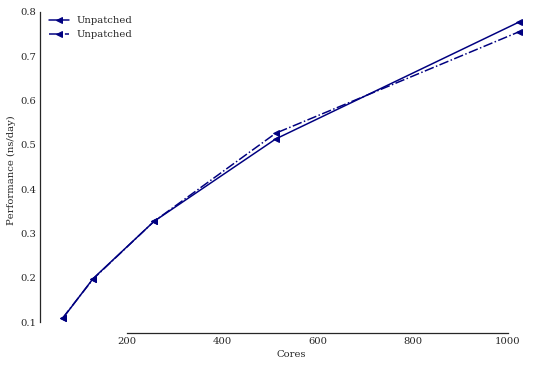

In [16]:
plt.plot(gmx_cores_u, gmx_perf_u, '<-', color='navy', label='Unpatched')
plt.plot(gmx_cores_p, gmx_perf_p, '<-.', color='navy', label='Unpatched')
plt.xlabel('Cores')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine(trim=True)

### OpenSBLI

In [17]:
from appanalysis import osbli

In [18]:
osbli_u = {2:'../apps/OpenSBLI/results/CSD3Skylake/output_2nodes_201711251131.txt',
              5:'../apps/OpenSBLI/results/CSD3Skylake/output_5nodes_201711251143.txt',
              20:'../apps/OpenSBLI/results/CSD3Skylake/output_20nodes_201711251147.txt',
              32:'../apps/OpenSBLI/results/CSD3Skylake/output_32nodes_201711301117.txt',
             }

In [19]:
osbli_cores_u, osbli_time_u, osbli_su_u = osbli.calcperf(osbli_u, cpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              64           328.3            1.00
              5             160           154.4            2.13
             20             640            39.2            8.38
             32            1024            22.5           14.58


In [20]:
osbli_p = {2:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_2nodes_201801151114.txt',
              5:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_5nodes_201801151132.txt',
              8:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_8nodes_201801151056.txt',
           16:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_16nodes_201801151054.txt',
              32:'../apps/OpenSBLI/results/CSD3Skylake-patched/output_32nodes_201801151040.txt',
             }

In [21]:
osbli_cores_p, osbli_time_p, osbli_su_p = osbli.calcperf(osbli_p, cpn)

          Nodes           Cores        Time (s)         Speedup
          =====           =====        ========         =======
              2              64           330.6            1.00
              5             160           138.6            2.39
              8             256            83.0            3.98
             16             512            41.4            7.98
             32            1024            21.2           15.57


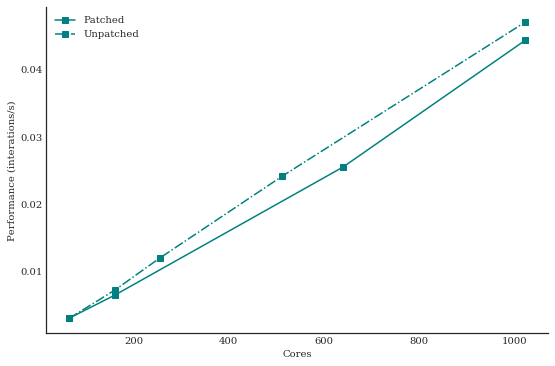

In [52]:
plt.plot(osbli_cores_u, [1/x for x in osbli_time_u], 's-', color='teal', label='Patched')
plt.plot(osbli_cores_p, [1/x for x in osbli_time_p], 's-.', color='teal', label='Unpatched')
plt.xlabel('Cores')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()

## Synthetic Benchmarks

## benchio (MPI-IO read bandwidth)

In [24]:
from synthanalysis import benchio
import pandas as pd

In [25]:
resdir = '../synth/benchio/results/CSD3Skylake'
files = benchio.get_filelist(resdir, "benchio_")
df_list = []
for file in files:
    df_list.extend(benchio.getperf(file))
benchio_res_u = pd.DataFrame(df_list) 
writers_u, maxwrite_u = benchio.get_perf_stats(benchio_res_u, -1, 256, 'max', writestats=True)

                                  Write                            \
                                    min       median          max   
Writers Striping LocalSize                                          
32      -1       256         495.391617   604.803836   636.878110   
64      -1       256         223.516885   619.982881   734.525128   
128     -1       256         272.915353  2193.856663  2426.772131   
256     -1       256         711.355222  3671.515853  4319.454011   
512     -1       256        4525.734573  5859.905924  7832.476586   
1024    -1       256        1388.155565  4950.487578  7280.052396   

                                        Count  
                                   mean   sum  
Writers Striping LocalSize                     
32      -1       256         596.340637    20  
64      -1       256         585.273656    20  
128     -1       256        1860.948735    30  
256     -1       256        3151.127936    20  
512     -1       256        5802.721034   

In [26]:
resdir = '../synth/benchio/results/CSD3Skylake-patched'
files = benchio.get_filelist(resdir, "benchio_")
df_list = []
for file in files:
    df_list.extend(benchio.getperf(file))
benchio_res_p = pd.DataFrame(df_list) 
writers_p, maxwrite_p = benchio.get_perf_stats(benchio_res_p, -1, 256, 'max', writestats=True)

                                  Write                            \
                                    min       median          max   
Writers Striping LocalSize                                          
32      -1       256         478.419608   498.712175   558.110451   
64      -1       256         599.035827   636.006058   642.350794   
128     -1       256        1670.827966  1938.053055  2006.403979   
256     -1       256        3570.643235  3743.316042  3839.521461   
512     -1       256        6090.346281  6441.059608  6589.572467   
1024    -1       256        5748.729080  6351.363864  6722.794248   

                                        Count  
                                   mean   sum  
Writers Striping LocalSize                     
32      -1       256         502.118539    10  
64      -1       256         632.220207    10  
128     -1       256        1918.325733    10  
256     -1       256        3708.826320    10  
512     -1       256        6376.192195   

In [58]:
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Writers','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=======','=========','=======','=========='))
for i, cores in enumerate(writers_u):
    print('{:15d}{:15.3f}{:15.3f}{:15.3f}'.format(cores, maxwrite_u[i], maxwrite_p[i],maxwrite_p[i]/maxwrite_u[i]))

        Writers      Unpatched        Patched     Comparison
        =======      =========        =======     ==========
             32        636.878        558.110          0.876
             64        734.525        642.351          0.875
            128       2426.772       2006.404          0.827
            256       4319.454       3839.521          0.889
            512       7832.477       6589.572          0.841
           1024       7280.052       6722.794          0.923


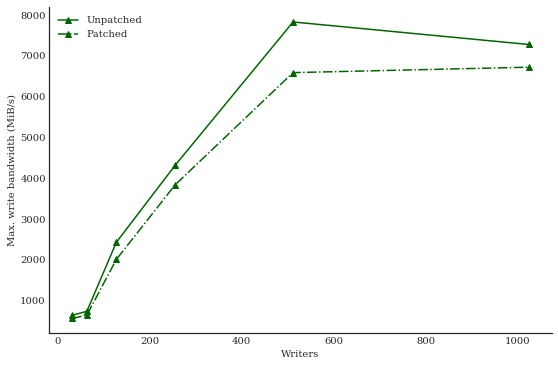

In [28]:
fig, ax = plt.subplots()
plt.plot(writers_u, maxwrite_u, 'r^-', color='darkgreen', label='Unpatched')
plt.plot(writers_p, maxwrite_p, 'r^-.', color='darkgreen', label='Patched')
plt.xlabel('Writers')
plt.ylabel('Max. write bandwidth (MiB/s)')
plt.legend(loc='best')
sns.despine()

### mdtest (Metadata Server performance)

In [29]:
from synthanalysis import mdtest

In [30]:
mdtest_cpn = {}
mdtest_cores = {}
mdtest_create = {}
mdtest_stat = {}
mdtest_remove = {}
mdtest_sty = {}
mdtest_systems = ['Unpatched','Patched']
mdtest_test = 'mp-mf-sd'

In [31]:
files_u = {2:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_2nodes_201711281530.log',
               4:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_4nodes_201711281506.log',
               8:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_8nodes_201711281428.log',
               16:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_16nodes_201711281628.log',
               32:'../synth/mdtest/results/CSD3Skylake/mdtest_{0}_1048576_32nodes_201711281514.log'
              }

In [32]:
mdtest_sys = 'Unpatched'
key = '{0},{1}'.format(mdtest_sys, mdtest_test)
mdtest_cpn[mdtest_sys] = 32
mdtest_sty[mdtest_sys] = '^-'
mdtest_cores[key], mdtest_create[key], mdtest_stat[key], mdtest_remove[key] = mdtest.calcperf(files_u, mdtest_test, mdtest_cpn[mdtest_sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              64       10447.905       15785.713        7996.072
              4             128       21623.942       28257.865        8869.195
              8             256       40588.567       65347.554       18597.795
             16             512       54151.757      116107.385       31821.267
             32            1024       43346.112      142800.723       37725.149


In [33]:
files_p = {2:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_2nodes_201801151156.log',
               4:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_4nodes_201801151206.log',
               8:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_8nodes_201801151232.log',
               16:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_16nodes_201801151318.log',
               32:'../synth/mdtest/results/CSD3Skylake-patched/mdtest_{0}_1048576_32nodes_201801151340.log'
              }

In [34]:
mdtest_sys = 'Patched'
key = '{0},{1}'.format(mdtest_sys, mdtest_test)
mdtest_cpn[mdtest_sys] = 32
mdtest_sty[mdtest_sys] = '^-'
mdtest_cores[key], mdtest_create[key], mdtest_stat[key], mdtest_remove[key] = mdtest.calcperf(files_p, mdtest_test, mdtest_cpn[mdtest_sys])

          Nodes           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
          =====           =====  ==============    ============  ==============
              2              64       12582.352       16876.589        8143.513
              4             128       24351.472       35458.157       10943.393
              8             256       42483.722       65726.348       19097.160
             16             512       39714.967      114334.240       24133.016
             32            1024       44550.951      121263.862       38387.316


In [62]:
key = '{0},{1}'.format('Unpatched', mdtest_test)
print('Create:')
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Writers','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=======','=========','=======','=========='))
for i, writers in enumerate(mdtest_cores[key]):
    ukey = '{0},{1}'.format('Unpatched', mdtest_test)
    pkey = '{0},{1}'.format('Patched', mdtest_test)
    perf_u = mdtest_create[ukey][i]
    perf_p = mdtest_create[pkey][i]
    print('{:15.0f}{:15.0f}{:15.0f}{:15.3f}'.format(writers, perf_u, perf_p, perf_p/perf_u))

Create:
        Writers      Unpatched        Patched     Comparison
        =======      =========        =======     ==========
             64          10448          12582          1.204
            128          21624          24351          1.126
            256          40589          42484          1.047
            512          54152          39715          0.733
           1024          43346          44551          1.028


#### Multiple processes each writing file to single directory

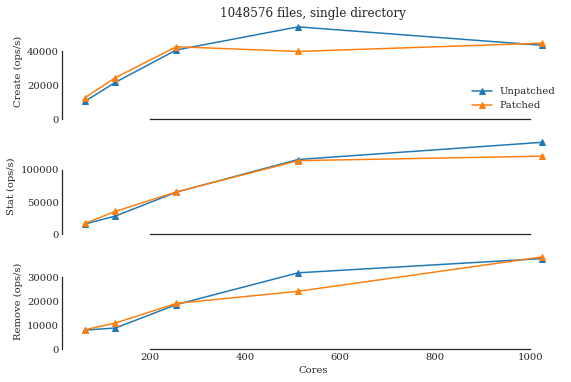

In [36]:
ax1 = plt.subplot(311)
for system in mdtest_systems:
    key = '{0},{1}'.format(system, mdtest_test)
    plt.plot(mdtest_cores[key], mdtest_create[key], mdtest_sty[system], label=system)
plt.title('1048576 files, single directory')
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in mdtest_systems:
    key = '{0},{1}'.format(system, mdtest_test)
    plt.plot(mdtest_cores[key], mdtest_stat[key], mdtest_sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in mdtest_systems:
    key = '{0},{1}'.format(system, mdtest_test)
    plt.plot(mdtest_cores[key], mdtest_remove[key], mdtest_sty[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Cores')
sns.despine(trim=True)

In [37]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in mdtest_systems:
    key = '{0},{1}'.format(system, mdtest_test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(mdtest_create[key]), max(mdtest_stat[key]), max(mdtest_remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
      Unpatched       54151.757      142800.723       37725.149
        Patched       44550.951      121263.862       38387.316


### b_eff HPCC MPI benchmark

All bandwidth and latency numbers are per-process.

In [38]:
from synthanalysis import hpcc

In [39]:
beff_u = {2:'../synth/HPCC/beff_results/CSD3Skylake/nodes2ppn32_201711232059_hpccoutf.txt',
              4:'../synth/HPCC/beff_results/CSD3Skylake/nodes4ppn32_201711232109_hpccoutf.txt',
              8:'../synth/HPCC/beff_results/CSD3Skylake/nodes8ppn32_201711232113_hpccoutf.txt',
              16:'../synth/HPCC/beff_results/CSD3Skylake/nodes16ppn32_201711232116_hpccoutf.txt',
              32:'../synth/HPCC/beff_results/CSD3Skylake/nodes32ppn32_201711232118_hpccoutf.txt'
             }

In [40]:
beff_p = {2:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes2ppn32_201801151342_hpccoutf.txt',
              4:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes4ppn32_201801151318_hpccoutf.txt',
              8:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes8ppn32_201801151234_hpccoutf.txt',
              16:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes16ppn32_201801151230_hpccoutf.txt',
              32:'../synth/HPCC/beff_results/CSD3Skylake-patched/nodes32ppn32_201801151206_hpccoutf.txt'
             }

#### Random ring

In [68]:
beff_cores_u, beff_rrbw_u, beff_rrlat_u = hpcc.calcbeffperf(beff_u, cpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64           1.469           1.277
              4             128           1.416           1.362
              8             256           0.834           1.362
             16             512           1.081           1.431
             32            1024           0.793           1.431


In [69]:
beff_cores_p, beff_rrbw_p, beff_rrlat_p = hpcc.calcbeffperf(beff_p, cpn, restype='rr')

Random Ring results:
          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64           1.416           1.277
              4             128           1.348           1.362
              8             256           0.828           1.431
             16             512           1.025           1.431
             32            1024           0.776           1.567


In [70]:
print('Random-ring bandwidth:')
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Ranks','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=====','=========','=======','=========='))
for i, ranks in enumerate(beff_cores_u):
    perf_u = beff_rrbw_u[i]
    perf_p = beff_rrbw_p[i]
    print('{:15.0f}{:15.3f}{:15.3f}{:15.3f}'.format(ranks, perf_u, perf_p, perf_p/perf_u))
print('Random-ring latency:')
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Ranks','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=====','=========','=======','=========='))
for i, ranks in enumerate(beff_cores_u):
    perf_u = beff_rrlat_u[i]
    perf_p = beff_rrlat_p[i]
    print('{:15.0f}{:15.3f}{:15.3f}{:15.3f}'.format(ranks, perf_u, perf_p, perf_p/perf_u))

Random-ring bandwidth:
          Ranks      Unpatched        Patched     Comparison
          =====      =========        =======     ==========
             64          1.469          1.416          0.964
            128          1.416          1.348          0.952
            256          0.834          0.828          0.994
            512          1.081          1.025          0.948
           1024          0.793          0.776          0.979
Random-ring latency:
          Ranks      Unpatched        Patched     Comparison
          =====      =========        =======     ==========
             64          1.277          1.277          1.000
            128          1.362          1.362          1.000
            256          1.362          1.431          1.051
            512          1.431          1.431          1.000
           1024          1.431          1.567          1.095


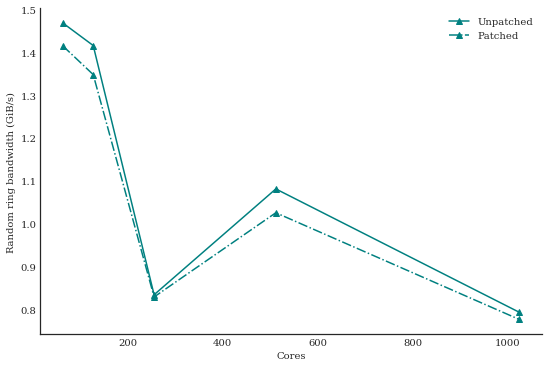

In [71]:
plt.plot(beff_cores_u, beff_rrbw_u, '^-', color='teal', label='Unpatched')
plt.plot(beff_cores_p, beff_rrbw_p, '^-.', color='teal', label='Patched')
plt.xlabel('Cores')
plt.ylabel('Random ring bandwidth (GiB/s)')
plt.legend(loc='best')
sns.despine()

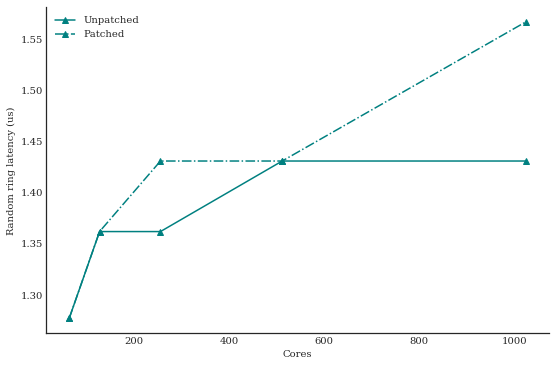

In [72]:
plt.plot(beff_cores_u, beff_rrlat_u, '^-', color='teal', label='Unpatched')
plt.plot(beff_cores_p, beff_rrlat_p, '^-.', color='teal', label='Patched')
plt.xlabel('Cores')
plt.ylabel('Random ring latency (us)')
plt.legend(loc='best')
sns.despine()

#### Ping-pong

In [78]:
beff_ppcores_u, beff_ppbw_u, beff_pplat_u = hpcc.calcbeffperf(beff_u, cpn, restype='pp')

          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64          10.850           1.241
              4             128           7.877           1.647
              8             256           6.037           1.258
             16             512           6.037           1.263
             32            1024           5.938           1.669


In [79]:
beff_ppcores_p, beff_ppbw_p, beff_pplat_p = hpcc.calcbeffperf(beff_p, cpn, restype='pp')

          Nodes           Cores      BW (GiB/s)       Lat. (us)
          =====           =====      ==========       =========
              2              64          10.416           1.241
              4             128           7.973           1.276
              8             256           6.001           1.258
             16             512           7.988           1.278
             32            1024           8.155           1.647


In [83]:
print('Ping-pong minimum bandwidth:')
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Ranks','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=====','=========','=======','=========='))
for i, ranks in enumerate(beff_cores_u):
    perf_u = beff_ppbw_u[i]
    perf_p = beff_ppbw_p[i]
    print('{:15.0f}{:15.3f}{:15.3f}{:15.3f}'.format(ranks, perf_u, perf_p, perf_p/perf_u))
print('Ping-pong maximum latency:')
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Ranks','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=====','=========','=======','=========='))
for i, ranks in enumerate(beff_cores_u):
    perf_u = beff_pplat_u[i]
    perf_p = beff_pplat_p[i]
    print('{:15.0f}{:15.3f}{:15.3f}{:15.3f}'.format(ranks, perf_u, perf_p, perf_p/perf_u))

Ping-pong minimum bandwidth:
          Ranks      Unpatched        Patched     Comparison
          =====      =========        =======     ==========
             64         10.850         10.416          0.960
            128          7.877          7.973          1.012
            256          6.037          6.001          0.994
            512          6.037          7.988          1.323
           1024          5.938          8.155          1.373
Ping-pong maximum latency:
          Ranks      Unpatched        Patched     Comparison
          =====      =========        =======     ==========
             64          1.241          1.241          1.000
            128          1.647          1.276          0.775
            256          1.258          1.258          1.000
            512          1.263          1.278          1.012
           1024          1.669          1.647          0.987


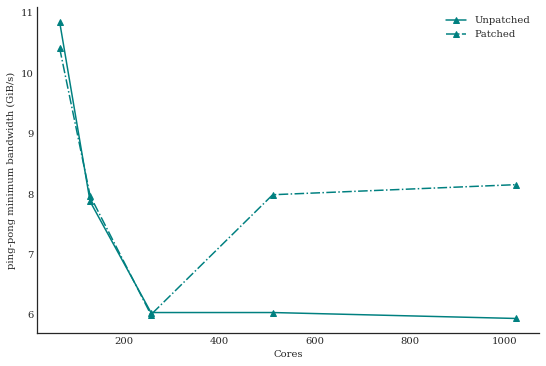

In [81]:
plt.plot(beff_ppcores_u, beff_ppbw_u, '^-', color='teal', label='Unpatched')
plt.plot(beff_ppcores_p, beff_ppbw_p, '^-.', color='teal', label='Patched')
plt.xlabel('Cores')
plt.ylabel('ping-pong minimum bandwidth (GiB/s)')
plt.legend(loc='best')
sns.despine()

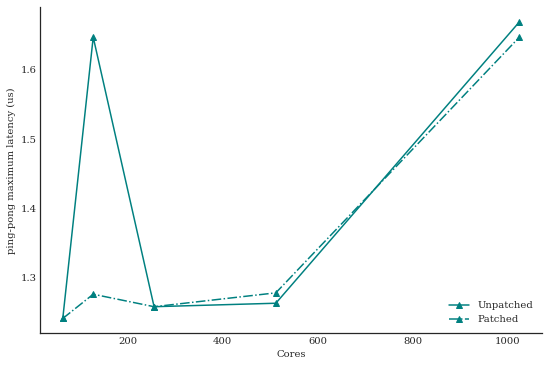

In [82]:
plt.plot(beff_ppcores_u, beff_pplat_u, '^-', color='teal', label='Unpatched')
plt.plot(beff_ppcores_p, beff_pplat_p, '^-.', color='teal', label='Patched')
plt.xlabel('Cores')
plt.ylabel('ping-pong maximum latency (us)')
plt.legend(loc='best')
sns.despine()